# Spectral analysis using QGSP

This example demonstrates how to build a quaternion graph signal, a quaternion-weighted graph and how to perform a spectral analysis of such signal.

In [4]:
# If gspx is not installed, we add it to the path
import os, sys
gdir = os.path.dirname(os.getcwd())  # parent folder
sys.path.insert(0, gdir)

In [5]:
import numpy as np

from gspx.utils.display import plot_graph
from gspx.datasets import WeatherGraphData, uk_weather
from gspx.signals import QuaternionSignal
from gspx.qgsp import create_quaternion_weights, QGFT, QMatrix

## Quaternion-weighted graph

In [6]:
uk_data = WeatherGraphData()
Ar, coords = uk_data.graph
s = uk_data.signal

df = uk_weather()

Aq = create_quaternion_weights(
    Ar, df, icols=['humidity'], jcols=['temp'],
    kcols=['wind_speed'], gauss_den=0.5)

100%|██████████| 2014/2014 [00:07<00:00, 276.65it/s]


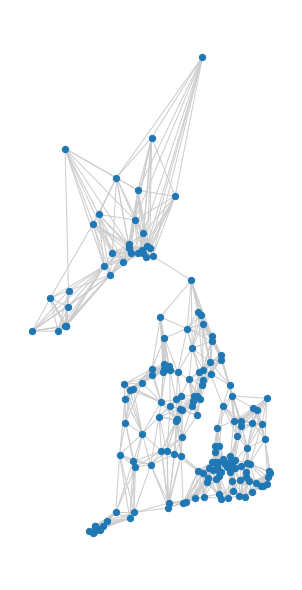

In [17]:
import matplotlib.pyplot as plt

plot_graph(
    Aq.abs(), coords=coords,
    figsize=(4, 8), colormap='viridis',
    node_size=40)
plt.savefig('../../phd-thesis/thesis/Figures/uk_qgsp_graph.pdf', dpi=300)

In [8]:
qgft = QGFT()
qgft.fit(Aq)

Running eigendecomposition of the shift operator.
Sorting the frequencies based on Total Variation.


## Total variation of each eigenvector for each eigenvalue

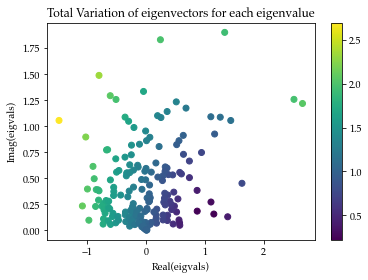

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(np.real(qgft.eigc), np.imag(qgft.eigc), c=qgft.tv_)
plt.colorbar()
plt.title("Total Variation of eigenvectors for each eigenvalue")
plt.xlabel("Real(eigvals)")
plt.ylabel("Imag(eigvals)")
plt.savefig('../../phd-thesis/thesis/Figures/uk_qgsp_tv.pdf', dpi=300)
plt.show()

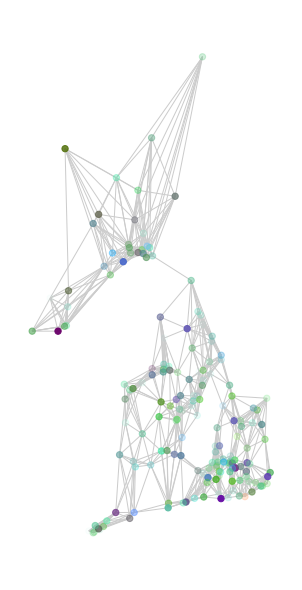

In [21]:
obj = QuaternionSignal.from_samples(s.matrix.ravel())
node_color = [tuple(rgba) for rgba in obj.to_rgba()]

plot_graph(
    Aq.abs(), coords=coords, colors=node_color,
    figsize=(4, 8), colormap='viridis',
    node_size=40)
plt.savefig('../../phd-thesis/thesis/Figures/uk_qgsp_graphsig.pdf', dpi=300)

In [22]:
ss = qgft.transform(s)

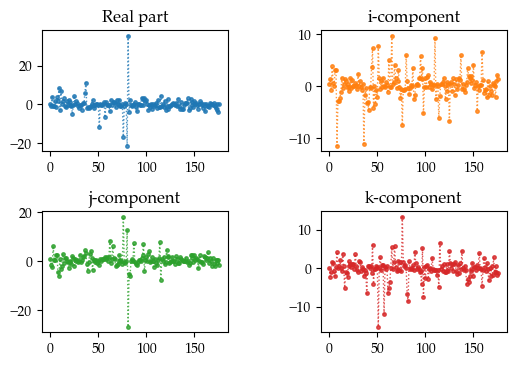

<Figure size 432x288 with 0 Axes>

In [24]:
QuaternionSignal.show(ss, ordering=qgft.idx_freq)
plt.savefig('../../phd-thesis/thesis/Figures/uk_qgsp_spectrumsig.pdf', dpi=300)